<a href="https://www.kaggle.com/code/osmanaydoan/birthday-problem-with-turkish-football-team?scriptVersionId=221239508" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**BİRTHDAY PROBLEM:**


Bu projenin ana amacı, meşhur "Doğum Günü Paradoksu" olarak bilinen matematiksel olasılık teorisini gerçek dünya verisi üzerinde test etmektir.

Doğum Günü Paradoksu şunu söyler: 23 kişilik bir grupta, en az iki kişinin aynı gün doğmuş olma olasılığı %50'den fazladır. Bu sonuç çoğu insana şaşırtıcı geldiği için "paradoks" olarak adlandırılır, ancak matematiksel olarak doğrudur.

# **Bizim burada yapacağımız elimizde doğum günü ve ayı olan kişileri bulup bunu kanıtlamak. **

**AŞAMALAR**

**Doğru Soru:**

1.) Hangi veriseti/verisetleri bu problem için uygundur?

 Cevap: Futbolcular

2.)Gerçek hayat verileriyle doğum günü problemini denemek için hangi sütunlar gereklidir?

 Cevap:

 **Gerekli Sütunlar:**
    
    - No
    - Oyuncu
    - Pozisyon
    - Doğum Tarihi
    - Takım

3.) Bu Veri Setini bulmak için hangi kaynak daha uygundur?

Cevap: Basit ve çok fazla veri gerektirmediği için chatGPT den bu sütunları(.csv formatında) otomatik oluşturması için yardım isteyebiliriz.

## ***DÜŞÜNCELERİM:***

1) ***Bu proje beni heyecanlandırdı mı?***

* Bir gerçek hayat durumunun matematikle ifade edilip sonrasında onu kod üzerinde kanıtlayabilmek güzeldi.

* Futbolcuların gerçek doğum tarihlerini kullanrak kimlerin aynı gün ve ayda doğduklarını kodlarla bulup göstermek baya güzeldi.

* Bunları kaç kişi üzerinden yaptığımızda bulduğumuzu görmek, yani kaç olaslılıkla bulduğumuzu görmek konuyu anlama ve bu olayın gerçekliğini kanıtlama açısından güzeldi.

# BAŞLANGIÇ

## 1. Veri Hazırlama ve Temizleme

### 1.1. Veri İnceleme

- CSV dosyasının yapısını ve içeriğini detaylı inceleme
- Eksik veya hatalı verileri tespit etme
- Tarih formatının standardizasyonunu kontrol etme

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/takimlar/takmlar.csv')


In [3]:
df.head()

,No,Oyuncu,Pozisyon,Doğum Tarihi,Takım
0,1,Fernando Muslera,Kaleci,1986-06-16,Galatasaray
1,2,Ahmet Şen,Kaleci,NaN,Galatasaray
2,3,Günay Güvenç,Kaleci,1991-06-25,Galatasaray
3,4,İsmail Jakobs,Defans,1999-08-17,Galatasaray
4,5,Davinson Sánchez,Defans,1996-06-12,Galatasaray


In [4]:
df['Doğum Tarihi'] = pd.to_datetime(df['Doğum Tarihi']) # Tarihle çalışacaksak bu önemli
df['Ay_Gün'] = df['Doğum Tarihi'].dt.strftime('%m-%d')  # string format time

In [5]:
df.head()

,No,Oyuncu,Pozisyon,Doğum Tarihi,Takım,Ay_Gün
0,1,Fernando Muslera,Kaleci,1986-06-16,Galatasaray,06-16
1,2,Ahmet Şen,Kaleci,NaT,Galatasaray,NaN
2,3,Günay Güvenç,Kaleci,1991-06-25,Galatasaray,06-25
3,4,İsmail Jakobs,Defans,1999-08-17,Galatasaray,08-17
4,5,Davinson Sánchez,Defans,1996-06-12,Galatasaray,06-12


### 1.2. Veri Temizleme

- Eksik verileri işleme (gerekirse kayıtları çıkarma veya alternatif yöntemler uygulama)

In [6]:
df.isnull().sum()

No              0
Oyuncu          0
Pozisyon        0
Doğum Tarihi    1
Takım           0
Ay_Gün          1
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

No              0
Oyuncu          0
Pozisyon        0
Doğum Tarihi    0
Takım           0
Ay_Gün          0
dtype: int64

## 2. Teorik Hesaplamalar

# Simple exponentiation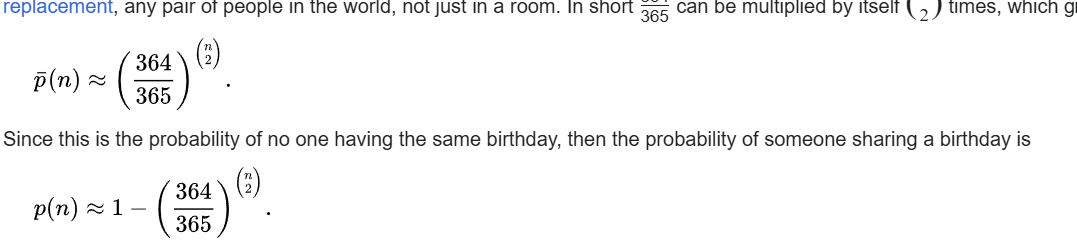

### 2.1. Olasılık Formülü İmplementasyonu

-1 Doğum günü paradoksunun matematiksel formülünü kodlama

-2 Farklı grup büyüklükleri için teorik olasılıkları hesaplama

-3 Veri setinden bir takım seçip 2 li eşleşmeleri bulma ve kaç olasılık üzerinden olduğunu gösterme

-4 Grupları birleştirip çoklu sayı üzerinden deneme yapma

In [9]:
from math import comb # *

# **1.)**

In [10]:
def kombinasyon(n, r):
    return comb(n, r)

In [11]:
kombinasyon(5,2)

10

In [12]:
def dogumGunuParadoks(n, k=2):
  cakısma = 1 - ((364/365) ** kombinasyon(n,k))
  return cakısma

# **2.)**

In [13]:
dogumGunuParadoks(23)

0.5004771540365807

In [14]:
df.head()

,No,Oyuncu,Pozisyon,Doğum Tarihi,Takım,Ay_Gün
0,1,Fernando Muslera,Kaleci,1986-06-16,Galatasaray,06-16
2,3,Günay Güvenç,Kaleci,1991-06-25,Galatasaray,06-25
3,4,İsmail Jakobs,Defans,1999-08-17,Galatasaray,08-17
4,5,Davinson Sánchez,Defans,1996-06-12,Galatasaray,06-12
5,6,Kaan Ayhan,Defans,1994-11-10,Galatasaray,11-10


# **3)**

In [15]:
df['Takım'].value_counts()

Takım
Galatasaray    18
Fenerbahçe     12
Beşiktaş       11
Bursaspor       6
Name: count, dtype: int64

In [16]:
df_gs = df.loc[df['Takım'] == 'Galatasaray']
df_gs

,No,Oyuncu,Pozisyon,Doğum Tarihi,Takım,Ay_Gün
0,1,Fernando Muslera,Kaleci,1986-06-16,Galatasaray,06-16
2,3,Günay Güvenç,Kaleci,1991-06-25,Galatasaray,06-25
3,4,İsmail Jakobs,Defans,1999-08-17,Galatasaray,08-17
4,5,Davinson Sánchez,Defans,1996-06-12,Galatasaray,06-12
5,6,Kaan Ayhan,Defans,1994-11-10,Galatasaray,11-10
6,7,Elias Jelert,Defans,2003-06-12,Galatasaray,06-12
7,8,Victor Nelsson,Defans,1998-10-14,Galatasaray,10-14
8,9,Abdülkerim Bardakcı,Defans,1994-09-07,Galatasaray,09-07
9,10,Metehan Baltacı,Defans,2003-02-05,Galatasaray,02-05
10,11,Kerem Demirbay,Orta Saha,1993-07-03,Galatasaray,07-03


In [17]:
def find_duplicate_birthdays(df):
  duplicates = df[df.duplicated(subset=['Ay_Gün'], keep=False)]
  return duplicates[['Oyuncu', 'Ay_Gün']]




In [18]:
find_duplicate_birthdays(df_gs)

,Oyuncu,Ay_Gün
4,Davinson Sánchez,06-12
6,Elias Jelert,06-12


In [19]:
def find_duplicate_birthdays(df):
  dp = df[df.duplicated(subset=['Ay_Gün'])]
  return dp

In [20]:
find_duplicate_birthdays(df)

,No,Oyuncu,Pozisyon,Doğum Tarihi,Takım,Ay_Gün
6,7,Elias Jelert,Defans,2003-06-12,Galatasaray,06-12
37,7,Gedson Fernandes,Orta Saha,1999-01-09,Beşiktaş,01-09


In [21]:
df_gs.shape

(18, 6)

In [22]:
kombinasyon(df_gs.shape[0],2)

153

In [23]:
dogumGunuParadoks(df_gs.shape[0])

0.34279109940182606

# **4)**

In [24]:
df_gs_fb = df.loc[(df['Takım'] == 'Galatasaray') | (df['Takım'] == 'Fenerbahçe')]
df_gs_fb.head()

,No,Oyuncu,Pozisyon,Doğum Tarihi,Takım,Ay_Gün
0,1,Fernando Muslera,Kaleci,1986-06-16,Galatasaray,06-16
2,3,Günay Güvenç,Kaleci,1991-06-25,Galatasaray,06-25
3,4,İsmail Jakobs,Defans,1999-08-17,Galatasaray,08-17
4,5,Davinson Sánchez,Defans,1996-06-12,Galatasaray,06-12
5,6,Kaan Ayhan,Defans,1994-11-10,Galatasaray,11-10


In [25]:
find_duplicate_birthdays(df_gs_fb)

,No,Oyuncu,Pozisyon,Doğum Tarihi,Takım,Ay_Gün
6,7,Elias Jelert,Defans,2003-06-12,Galatasaray,06-12


In [26]:
df_gs_fb_bjk = df.loc[df['Takım'].isin(['Galatasaray', 'Fenerbahçe','Beşiktaş'])]
df_gs_fb_bjk.shape

(41, 6)

In [27]:
find_duplicate_birthdays(df_gs_fb_bjk)


,No,Oyuncu,Pozisyon,Doğum Tarihi,Takım,Ay_Gün
6,7,Elias Jelert,Defans,2003-06-12,Galatasaray,06-12
37,7,Gedson Fernandes,Orta Saha,1999-01-09,Beşiktaş,01-09


In [28]:
dogumGunuParadoks(df_gs_fb_bjk.shape[0])

0.8945647728747912